### Özellik Ölçeklendirme (Feature Scaling)

* 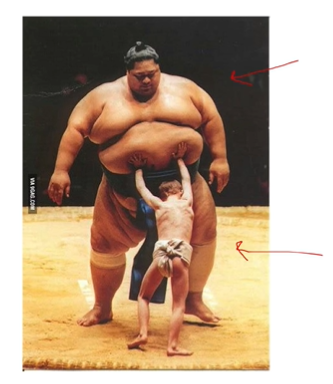
* Yukarıdaki görselde yarışmacılar arasındaki fark göze çarpmaktadır.
* Bizim özellik ölçeklendirmedeki amacımız değişkenler arasındaki ölçüm farklılığını gidermektir. Yani şöyle bir görevimiz var. Kullanılacak olan modellerin değişkenlere eşit şartlar altında yaklaşmasını sağlamaya çalışmaktır.

* Bunu şöyle bir örnekle pekiştirelim:
* 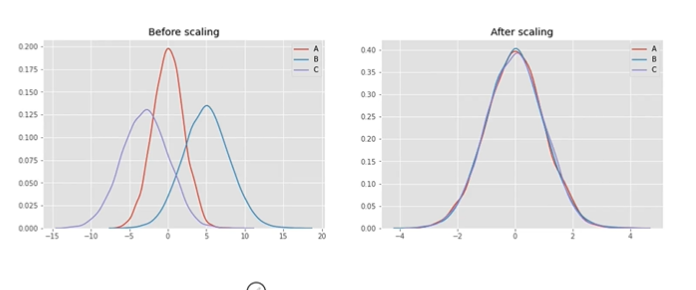
* Diyelim ki elimizde 3 tane değişken olsun bu değişkenlerden birisi filmlere verilen puan sayısı, mazi olan eğri filmlere yapılan yorum sayısı, kırmızı ise filmlere verilen 1-10 arası puan olsun. Bu üç değişkenin dalları (ölçekleri) farklı olduğu için aynı etkiler açısından bir modelleme tekniğine gönderemeyiz. Bundan dolayı bu üç değişken sağdaki görseldeki gibi ölçeklendirilir.
* Birinci maddemiz tüm değişkenleri eşit şartlar altında değerlendirebilmek adına ölçeklendirmektir. Neden? Çünkü yukarıdaki üç değişkenin birbirinde büyük olmasını numerik değişkenlerden oluşuyor olmasından dolayı kullanılacak olan yöntemler de büyük ya da küçük olarak algılayabilir. Sadece sayılardan anlıyor olduğundan dolayı buradaki büyüklük küçüklük algısının birbiriyle benzer ama kendi içindeki dalları korunuyor olarak sağlanması gerekir. Bunu uygulama bölümünde daha net görüyor olacağız.

* 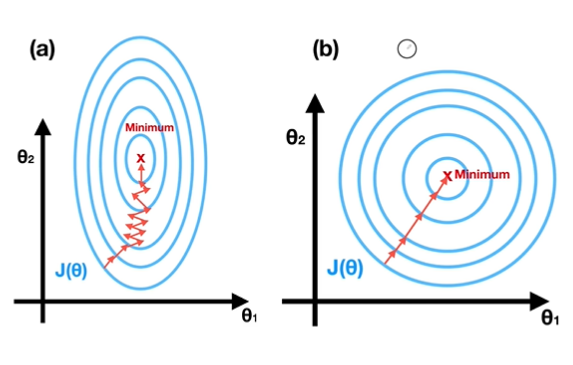
* İkinci önemli maddemiz özellikle gradient descent kullanan algoritmaların train sürelerini kısaltma durumudur.
* DİKKAT: Scale edilmiş featurelar söz konusu olduğundan bu ölçeklendirilmiş featureların üreteceği errorların boyutları ve bunların iteratif olarak azaltılması çabası değişkenler standart olduğunda daha hızlı olmaktadır. Dolayısıyla ölçekleri birbirinden farklı olması durumunda bu değişkenler üzerinden minimum noktaya erişecek şekilde gradient descent yöntemini kullandığımızda bunun süresi daha uzun sürmektedir (soldaki görsel). Çünkü her iterasyonda ölçek farklılıklarından kaynaklanan errorların boyutları büyük olacağından dolayı daha uzun sürede minimum noktaya erişiliyor olacaktır.
* Toplarlayacak olursak birinciönemli madde kullanılacak olan yöntemlere değişkenleri gönderirken onlara eşit muamele yapılması gerektiğini bilmeliyiz. Bundan dolayı bir standartlaştırmaya ihtiyacımız var. İkinci önemli maddemiz özellikle gradient descent kullanan algoritmaların eğitim (train) sürelerini kısaltmak için. 
* DİKKAT: Bir üçüncü maddemiz var: Uzaklık temelli yöntemlerde büyük değerlere sahip değişkenler dominantlık sergilemektedir. Yani ezicilik sergilemektedirler. Bu da aslında birinci madde ile aynı anlama sahip ama üçüncü madde gibi bunu da uzaklık temelli yöntemlere yaklaştırarak değerlendirelim. Özellikle knn k-means ve pca gibi uzaklık temelli ya da benzerlik/benzemezlik temelli bazı yöntemler kullanılıyor olduğunda burada ölçeklerin birbirinden farklı olması durumu yapılacak olan uzaklık yakınlık benzerlik benzemezlik hesaplarında yanlılığa sebep olmaktadır. Dolayısıyla yapacak olduğumuz işlem değişkenleri standartlaştırma işlemidir. Bunun sebebi eşit şartlarda yaklaşmak, eğitim süresini hızlandırmak ve özellikle uzaklık temelli yöntemlerde yanlılığın önüne geçmek. İstisna olmaz mı gibi bir soru soracak olursak. Evet istisnamız var. Tüm algoritmalar mı bundan etkileniyor tabii ki hayır. Mesela ağaca dayalı yöntemlerin birçoğu eksik değerden, aykırı değerden etkilenmez. Standartlaştırmalardan etkilenmez. Bunun sebebi dallara ayırma işlemleri için değişkenlerin değerleri küçükten büyüğe bir sıralama işlemine tabii tutulur ve bu noktalardan bölünerek dallamalar neticesinde entropiler heterojenlikler homojenlikler hesaplanır. Bundan olayı ağaç yöntemleri etkilenmez. Ancak genel eğilimimiz özellikleri ölçeklendirmek yönünde olmalıdır.

#### StandardScaler (z standartlaştırılması): Klasik standartlaştırma. Ortalamayı çıkar, standart sapmaya böl. z = (x - u) / s

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [2]:
def load():
    data = pd.read_csv("titanic.csv")
    return data

In [3]:
df = load()
ss = StandardScaler()
df["Age_standard_scaler"] = ss.fit_transform(df[["Age"]])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365


#### RobustScaler: Medyanı çıkar iqr'a böl.

In [4]:
rs = RobustScaler()
df["Age_robuts_scaler"] = rs.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standard_scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robuts_scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909


* DİKKAT: Neden robust?
* Standart scaler tüm gözlem birimlerinden ortalamayı çıkarır, standart sapmaya böler. Standart sapma da ortalama da aslında veri setindeki aykırı değerlerden etkilenen metriklerdir. Dolayısıyla aslında burada tüm gözlem birimlerinden medyanı çıkarsak daha sonra bölme işlemi için de yine satndart sapma gibi aykırı değerlerden etkilenen bir değeri değil de iqr'a bölsek, bu şekilde hem yine merkezi eğilimi ve değişimi göz önünde bulundurmuş oluruz. Hem de daha robust bir standartlaştırma işlemi yapmış oluruz. 
* DİKKAT: Burası oldukça önemli bir noktadır. RobustScaler StandarScaler'a göre aykırı değerlere karşı dayanıklı olduğundan dolayı daha tercih edilebilir olabilir fakat bunun kullanımını çok yaygınca görmüyor olacağız. Çeşitli veri bilimi platformlarında da yaygınca StandarScaler ya da MinMaxScaler görüyor olabiliriz. Fakat burada RobustScaler da oldukça değerli ve önemlidir. Aklımızın bir köşesinde kalmalıdır. Vahit Hoca StandardScaler'ın kuullanılmasını öneriyor.
* Yukarıdaki çıktığı incelendiğinde dağılımın yapısında değil de temsil noktasında bir değişiklik var. Yani ölçekolarak ifade ediliş tarzında ufak bir değişiklik var.
* DİKKAT: Önemli bir problem bir noktayla ilgili şu oluyor. Biz bunları değiştirdik ama veriyi bozduk mu? Hayır veriyi bozmadık.

#### MinMaxScaler: Verilen 2 değer arasında değişken dönüşümü

In [5]:
# FORMÜLASYONUMUZ:
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

In [6]:
mms = MinMaxScaler()
df["Age_min_max_scaler"] = mms.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standard_scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robuts_scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909
Age_min_max_scaler,714.000,0.368,0.183,0.000,0.248,0.347,0.472,1.000


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robuts_scaler,Age_min_max_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530,-0.336,0.271
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572,0.559,0.472
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255,-0.112,0.321
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365,0.392,0.435
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365,0.392,0.435


In [9]:
# Bu sonuçları karşılaştırmak istediğimizi düşünelim:

# İlgili veri setinde içerisinde yaş ifadesini barındıran değişkenleri seçiyoruz: 
age_cols = [col for col in df.columns if "Age" in col]
age_cols

['Age', 'Age_standard_scaler', 'Age_robuts_scaler', 'Age_min_max_scaler']

In [11]:
# Bu fonksiyon burasının konusu değil, sadece görselleştirme yapmak için kullanacağız.
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

* DİKKAT: Yapmak istediğimiz şey ortaya çıkan değişkenlerin yeni değerlerinde bir değişiklik var mı bunu gözlemlemek. Bu sebeple age sütunlarında gezelim ve num_summary'i plot argümanını True yaparak çalıştıralım.

count   714.000
mean     29.699
std      14.526
min       0.420
5%        4.000
10%      14.000
20%      19.000
30%      22.000
40%      25.000
50%      28.000
60%      31.800
70%      36.000
80%      41.000
90%      50.000
95%      56.000
99%      65.870
max      80.000
Name: Age, dtype: float64


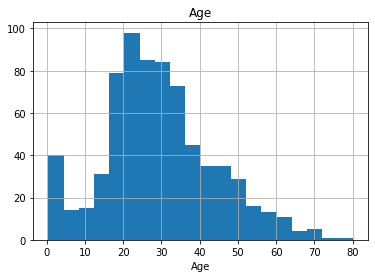

count   714.000
mean      0.000
std       1.001
min      -2.017
5%       -1.770
10%      -1.081
20%      -0.737
30%      -0.530
40%      -0.324
50%      -0.117
60%       0.145
70%       0.434
80%       0.778
90%       1.398
95%       1.812
99%       2.492
max       3.465
Name: Age_standard_scaler, dtype: float64


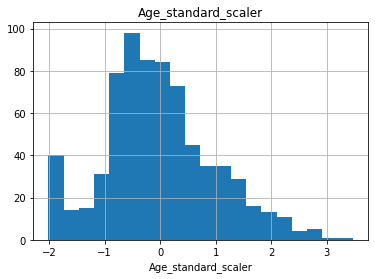

count   714.000
mean      0.095
std       0.813
min      -1.543
5%       -1.343
10%      -0.783
20%      -0.503
30%      -0.336
40%      -0.168
50%       0.000
60%       0.213
70%       0.448
80%       0.727
90%       1.231
95%       1.566
99%       2.119
max       2.909
Name: Age_robuts_scaler, dtype: float64


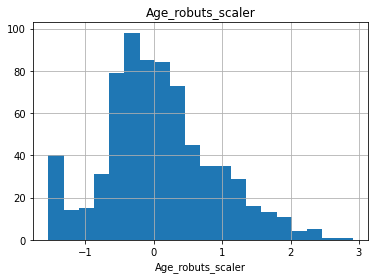

count   714.000
mean      0.368
std       0.183
min       0.000
5%        0.045
10%       0.171
20%       0.233
30%       0.271
40%       0.309
50%       0.347
60%       0.394
70%       0.447
80%       0.510
90%       0.623
95%       0.698
99%       0.822
max       1.000
Name: Age_min_max_scaler, dtype: float64


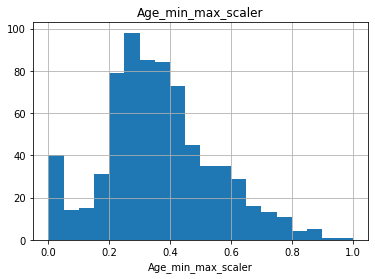

In [12]:
for col in age_cols:
    num_summary(df, col, plot=True)

* DİKKAT: Grafiklerdeki dağılıma bakalım. Grafiklerdeki dağılımlar hep aynıdır. Değişiklik x eksenindeki değerler yani değişkenin değerlerinin ifade ediliş (ölçek) tarzıdır. Yapacak olduğumuz işlemlerde değişkenlere eşit yaklaşılmasını sağlamaya çalışmak demek onların yapısını bozmak demek değildir. Yapılarını koruyacak şekilde ifade ediliş tarzlarını değiştirmek demektir. Değişkenlerin taşıdığı bilgiyi değiştirmedik. Aynen duruyor.

#### Numeric to Categorical: Sayısal Değişkenleri Kateorik Değişkenlere Çevirme
###### Binning
* Amacımız veri setindeki sayısal değişkenleri kategorik değişkenlere çevirmektir.

In [13]:
# cut veya qcut fonksiyonu kullanabiliriz, biz qcut fonksiyonunu kullandık.
# df["Age_qcut"] = pd.qcut(df['Age'], 5, labels=mylabels)
df["Age_qcut"] = pd.qcut(df['Age'], 5)

* DİKKAT: Eğer kullanacak olduğumuz yani dönüştürecek olduğumuz değişkeni hangi sınıflara dönüştürmek istediğimizi biliyorsak bu durumda label argümanını kullanabiliriz. Bunun yanında biz buradaki yaşı 5 parçaya böldüğümüzde olgun yetişkin vs. sınıflar yapabiliriz ama birçok senaryoda elimizdeki sayısal değişkeni kategorilere böldüğümüzde bu kategorilere ne isim vermemiz gerektiğini bilemeyebiliriz. Bu durumda label girmeden de qcut fonksiyonunu kullanarak direkt sayısal değişkenleri kategorik değişkenlere çevirebiliriz.
* DİKKAT: qcut metodu bir değişkenin değerlerini küçükten büyüğe sıralar ve çeyrek değerlere göre 5 parçaya böler.

In [15]:
df.head()
# Age_qcut değişkeni çeyrek değerlere göre bölünmüş oldu:

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robuts_scaler,Age_min_max_scaler,Age_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530,-0.336,0.271,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572,0.559,0.472,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255,-0.112,0.321,"(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365,0.392,0.435,"(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365,0.392,0.435,"(31.8, 41.0]"
